***Filtering out only the necessary columns which is important for prediction***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Define the path to your CSV file
file_path = '/content/drive/MyDrive/bioinformatics/variant_summary.csv'

# Define the columns you want to KEEP
columns_to_keep = [
    'Type', 'GeneSymbol', 'ClinicalSignificance', 'ClinSigSimple', 'Chromosome',
    'Start', 'Stop', 'ReferenceAllele', 'AlternateAllele', 'Name',
    'ReviewStatus', 'NumberSubmitters', 'Origin'
]

# Load only the required columns (memory efficient)
df = pd.read_csv(file_path, usecols=columns_to_keep)

# Display the first few rows to check if it's loaded correctly
df.head()


<ipython-input-33-80b412579eb0>:14: DtypeWarning:

Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.



,Type,Name,GeneSymbol,ClinicalSignificance,ClinSigSimple,Origin,Chromosome,Start,Stop,ReferenceAllele,AlternateAllele,ReviewStatus,NumberSubmitters
0,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,AP5Z1,Pathogenic,1,germline;unknown,7,4820844,4820847,na,na,"criteria provided, multiple submitters, no con...",3
1,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,AP5Z1,Pathogenic,1,germline;unknown,7,4781213,4781216,na,na,"criteria provided, multiple submitters, no con...",3
2,Deletion,NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs),AP5Z1,Pathogenic,1,germline,7,4827361,4827374,na,na,no assertion criteria provided,1
3,Deletion,NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs),AP5Z1,Pathogenic,1,germline,7,4787730,4787743,na,na,no assertion criteria provided,1
4,single nucleotide variant,NM_014630.3(ZNF592):c.3136G>A (p.Gly1046Arg),ZNF592,Uncertain significance,0,germline,15,85342440,85342440,na,na,no assertion criteria provided,1


***ANALYZING THE CLINICAL SIGNIFICANCE COLUMN ****



In [ ]:
import plotly.express as px

counts = df['ClinicalSignificance'].value_counts().reset_index()
counts.columns = ['ClinicalSignificance', 'Count']

fig = px.bar(
    counts,
    x='Count',
    y='ClinicalSignificance',
    orientation='h',
    title='All Clinical Significance Categories',
    height=25 * len(counts)  # Adjusts height to fit everything
)

fig.show()


In [ ]:
pd.set_option('display.max_rows', None)  # Show all rows in output

# Show value counts as a table
df['ClinicalSignificance'].value_counts().to_frame().reset_index().rename(
    columns={'index': 'ClinicalSignificance', 'ClinicalSignificance': 'Count'}
)


,Count,count
0,Uncertain significance,3294977
1,Likely benign,1804630
2,Benign,420502
3,Pathogenic,357022
4,Conflicting classifications of pathogenicity,271818
5,Likely pathogenic,198640
6,Benign/Likely benign,98724
7,Pathogenic/Likely pathogenic,64197
8,not provided,23327
9,drug response,3769


***The clinical significance column has 94 varieties in which the uncertain significance is like 50 percent .. ***

In [ ]:
# Count the frequency of each label
value_counts = df['ClinicalSignificance'].value_counts()

# Keep only labels that occur 100 times or more and exclude the "-" category
valid_labels = value_counts[(value_counts >= 100) & (value_counts.index != '-')].index

# Filter the DataFrame to keep only those rows where 'ClinicalSignificance' is in the valid labels
df = df[df['ClinicalSignificance'].isin(valid_labels)]


***removal of the categories of clinical significance column which has less than 100 entries***

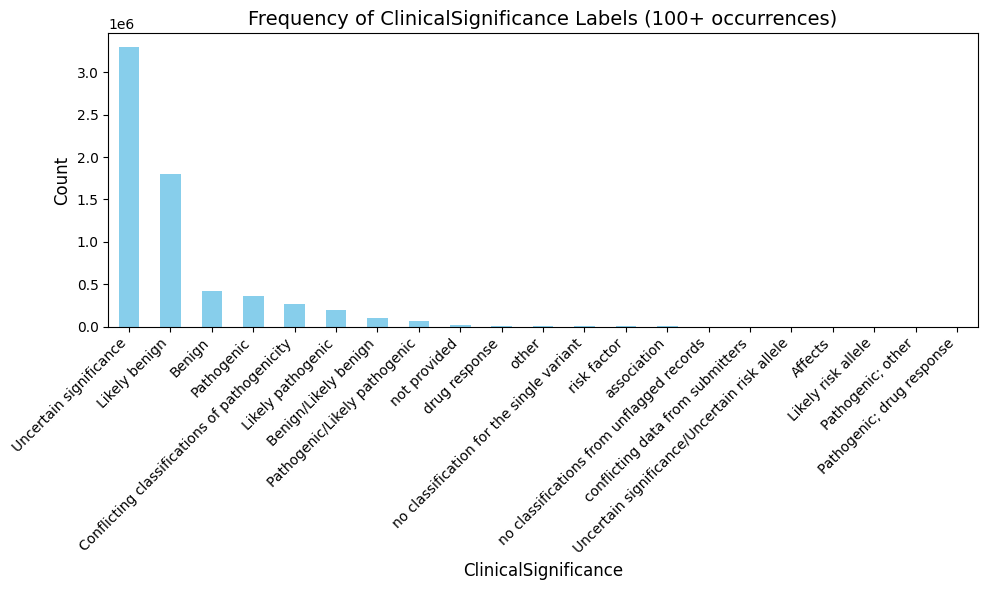

In [ ]:
import matplotlib.pyplot as plt

# Plotting the chart for the filtered 'ClinicalSignificance' column
plt.figure(figsize=(10, 6))
df['ClinicalSignificance'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of ClinicalSignificance Labels (100+ occurrences)', fontsize=14)
plt.xlabel('ClinicalSignificance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
# Count the frequency of each label in the filtered DataFrame
frequency_table = df['ClinicalSignificance'].value_counts().reset_index()

# Rename the columns for better readability
frequency_table.columns = ['ClinicalSignificance', 'Count']

# Display the table
print(frequency_table)


                            ClinicalSignificance    Count
0                         Uncertain significance  3294977
1                                  Likely benign  1804630
2                                         Benign   420502
3                                     Pathogenic   357022
4   Conflicting classifications of pathogenicity   271818
5                              Likely pathogenic   198640
6                           Benign/Likely benign    98724
7                   Pathogenic/Likely pathogenic    64197
8                                   not provided    23327
9                                  drug response     3769
10                                         other     3163
11      no classification for the single variant     1370
12                                   risk factor      814
13                                   association      700
14     no classifications from unflagged records      318
15              conflicting data from submitters      312
16  Uncertain 

***GROUPING OF LIKELY COLUMNS***

In [ ]:
# Define a mapping to group related categories into broader groups
grouping_map = {
    'Uncertain significance': 'Uncertain significance',
    'Uncertain significance/Uncertain risk allele': 'Uncertain significance',
    'Likely benign': 'Likely benign',
    'Benign': 'Benign',
    'Benign/Likely benign': 'Benign',
    'Benign/Likely benign; other': 'Benign',
    'Benign; risk factor': 'Benign',
    'Benign; protective': 'Benign',
    'Benign; drug response': 'Benign',
    'Likely pathogenic': 'Likely pathogenic',
    'Pathogenic': 'Pathogenic',
    'Pathogenic/Likely pathogenic': 'Likely pathogenic',
    'Likely pathogenic; drug response': 'Likely pathogenic',
    'Pathogenic; drug response': 'Pathogenic',
    'Pathogenic; other': 'Pathogenic',
    'Pathogenic; risk factor': 'Pathogenic',
    'Pathogenic/Likely pathogenic/Likely risk allele': 'Pathogenic',
    'Pathogenic/Likely risk allele': 'Pathogenic',
    'Pathogenic/Likely pathogenic; other': 'Pathogenic',
    'Conflicting classifications of pathogenicity': 'Conflicting classification of pathogenicity',
    'Drug response': 'Drug response',
    'Risk factor': 'Risk allele',
    'Likely risk allele': 'Risk allele',
}

# Apply the grouping to the 'ClinicalSignificance' column
df['Grouped_ClinicalSignificance'] = df['ClinicalSignificance'].map(grouping_map)

# Remove rows where 'Grouped_ClinicalSignificance' is NaN or from "Other" and "Not provided"
df = df[df['Grouped_ClinicalSignificance'].notna()]

# Count the frequency of each group
grouped_value_counts = df['Grouped_ClinicalSignificance'].value_counts().reset_index()

# Rename columns for better readability
grouped_value_counts.columns = ['Grouped_ClinicalSignificance', 'Count']

# Display the grouped table
print(grouped_value_counts)


                  Grouped_ClinicalSignificance    Count
0                       Uncertain significance  3295275
1                                Likely benign  1804630
2                                       Benign   519226
3                                   Pathogenic   357291
4  Conflicting classification of pathogenicity   271818
5                            Likely pathogenic   262837
6                                  Risk allele      194


***ANALYZING REFERENCE ALLELE AND ALTERNATIVE ALLELE COLUMN , CALCULATING ITS NAN VALUES***

In [ ]:
# Convert 'na' values in 'ReferenceAllele' and 'AlternateAllele' to NaN
df['ReferenceAllele'] = df['ReferenceAllele'].replace('na', float('nan'))
df['AlternateAllele'] = df['AlternateAllele'].replace('na', float('nan'))

# Now count the missing (NaN) values in both columns
missing_alternate_allele = df['AlternateAllele'].isnull().sum()
missing_reference_allele = df['ReferenceAllele'].isnull().sum()

# Print the results
print(f"Missing values in AlternateAllele: {missing_alternate_allele}")
print(f"Missing values in ReferenceAllele: {missing_reference_allele}")


Missing values in AlternateAllele: 6510763
Missing values in ReferenceAllele: 6511150


In [ ]:
# Drop the 'ReferenceAllele' and 'AlternateAllele' columns
df = df.drop(columns=['ReferenceAllele', 'AlternateAllele'])

# Verify that the columns have been dropped
print(df.head())


                        Type  \
0                      Indel   
1                      Indel   
2                   Deletion   
3                   Deletion   
4  single nucleotide variant   

                                                Name GeneSymbol  \
0  NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...      AP5Z1   
1  NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...      AP5Z1   
2     NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs)      AP5Z1   
3     NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs)      AP5Z1   
4       NM_014630.3(ZNF592):c.3136G>A (p.Gly1046Arg)     ZNF592   

     ClinicalSignificance  ClinSigSimple            Origin Chromosome  \
0              Pathogenic              1  germline;unknown          7   
1              Pathogenic              1  germline;unknown          7   
2              Pathogenic              1          germline          7   
3              Pathogenic              1          germline          7   
4  Uncertain significance              

***ANALYZING CLINSIGSIMPLE COLUMN***

Unique values in ClinSigSimple:
ClinSigSimple
0    5836240
1     675031
Name: count, dtype: int64

Missing values in ClinSigSimple: 0


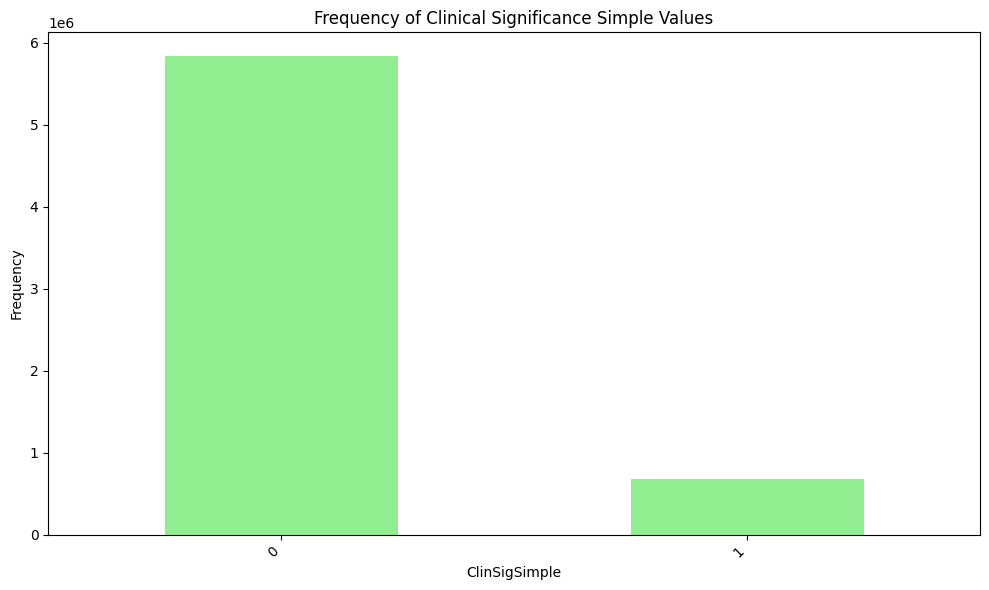

In [ ]:
# Count the unique values in the ClinSigSimple column
unique_values_clinsig = df['ClinSigSimple'].value_counts()

# Check for missing values in ClinSigSimple column
missing_clinsig = df['ClinSigSimple'].isnull().sum()

# Display the results
print("Unique values in ClinSigSimple:")
print(unique_values_clinsig)

print(f"\nMissing values in ClinSigSimple: {missing_clinsig}")

# Optional: Visualizing the distribution of ClinSigSimple
import matplotlib.pyplot as plt

# Plot the distribution of ClinSigSimple
plt.figure(figsize=(10, 6))
df['ClinSigSimple'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Clinical Significance Simple Values')
plt.xlabel('ClinSigSimple')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


***the means clinsigsimple just have only two category 0(indicating uncertain significance) and 1(indicating any other categories except uncertain significance) so its not useful ****

In [ ]:
# Drop the 'ClinSigSimple' column
df = df.drop(columns=['ClinSigSimple'])

# Verify the change
print(df.head())


                        Type  \
0                      Indel   
1                      Indel   
2                   Deletion   
3                   Deletion   
4  single nucleotide variant   

                                                Name GeneSymbol  \
0  NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...      AP5Z1   
1  NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...      AP5Z1   
2     NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs)      AP5Z1   
3     NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs)      AP5Z1   
4       NM_014630.3(ZNF592):c.3136G>A (p.Gly1046Arg)     ZNF592   

     ClinicalSignificance            Origin Chromosome     Start      Stop  \
0              Pathogenic  germline;unknown          7   4820844   4820847   
1              Pathogenic  germline;unknown          7   4781213   4781216   
2              Pathogenic          germline          7   4827361   4827374   
3              Pathogenic          germline          7   4787730   4787743   
4  Uncertain s

***ANALYZING REVIEW STATUS COLUMN***

In [ ]:
# Count the frequency of each category in ReviewStatus
review_status_counts = df['ReviewStatus'].value_counts()

# Display the unique categories and their frequencies
print("Review Status Counts:")
print(review_status_counts)


Review Status Counts:
ReviewStatus
criteria provided, single submitter                     4905754
criteria provided, multiple submitters, no conflicts    1067989
criteria provided, conflicting classifications           271029
no assertion criteria provided                           229038
reviewed by expert panel                                  37408
practice guideline                                           53
Name: count, dtype: int64


In [ ]:
reliable_statuses = [
    'practice guideline',
    'reviewed by expert panel',
    'criteria provided, multiple submitters, no conflicts',
    'criteria provided, single submitter',
    'criteria provided, conflicting classifications'  # ✅ now included
]
df = df[df['ReviewStatus'].isin(reliable_statuses)]


***giving confidence score based on review status***

In [ ]:
confidence_map = {
    'practice guideline': 1.0,
    'reviewed by expert panel': 0.95,
    'criteria provided, multiple submitters, no conflicts': 0.9,
    'criteria provided, single submitter': 0.7,
    'criteria provided, conflicting classifications': 0.5  # 🔥 Marked lower
}

df['ReviewConfidence'] = df['ReviewStatus'].map(confidence_map)


In [ ]:
df.drop(columns=['ClinicalSignificance'], inplace=True)


In [ ]:
df.head(10)  # Adjust the number as needed


,Type,Name,GeneSymbol,Origin,Chromosome,Start,Stop,ReviewStatus,NumberSubmitters,Grouped_ClinicalSignificance,ReviewConfidence
0,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,AP5Z1,germline;unknown,7,4820844,4820847,"criteria provided, multiple submitters, no con...",3,Pathogenic,0.9
1,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,AP5Z1,germline;unknown,7,4781213,4781216,"criteria provided, multiple submitters, no con...",3,Pathogenic,0.9
6,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),FOXRED1,germline,11,126145284,126145284,"criteria provided, multiple submitters, no con...",6,Pathogenic,0.9
7,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),FOXRED1,germline,11,126275389,126275389,"criteria provided, multiple submitters, no con...",6,Pathogenic,0.9
8,single nucleotide variant,NM_017547.4(FOXRED1):c.1289A>G (p.Asn430Ser),FOXRED1,germline,11,126147412,126147412,"criteria provided, single submitter",2,Likely pathogenic,0.7
9,single nucleotide variant,NM_017547.4(FOXRED1):c.1289A>G (p.Asn430Ser),FOXRED1,germline,11,126277517,126277517,"criteria provided, single submitter",2,Likely pathogenic,0.7
10,single nucleotide variant,NM_025152.3(NUBPL):c.166G>A (p.Gly56Arg),NUBPL,germline;paternal,14,32031331,32031331,"criteria provided, conflicting classifications",4,Conflicting classification of pathogenicity,0.5
11,single nucleotide variant,NM_025152.3(NUBPL):c.166G>A (p.Gly56Arg),NUBPL,germline;paternal,14,31562125,31562125,"criteria provided, conflicting classifications",4,Conflicting classification of pathogenicity,0.5
16,single nucleotide variant,NM_000410.4(HFE):c.193A>T (p.Ser65Cys),HFE,germline;unknown,6,26091185,26091185,"criteria provided, conflicting classifications",17,Conflicting classification of pathogenicity,0.5
17,single nucleotide variant,NM_000410.4(HFE):c.193A>T (p.Ser65Cys),HFE,germline;unknown,6,26090957,26090957,"criteria provided, conflicting classifications",17,Conflicting classification of pathogenicity,0.5


***ANALYZING THE TYPE COLUMN***

In [ ]:
df['Type'].value_counts()


,count
Type,
single nucleotide variant,5763394
Deletion,261307
Duplication,120562
Microsatellite,64545
Indel,29103
Insertion,22656
copy number loss,9184
copy number gain,7986
Inversion,2603


In [ ]:
# Save the cleaned dataframe as a CSV file
cleaned_file_path = "cleaned_variant_data.csv"  # Set your desired file path
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataframe saved to {cleaned_file_path}")


Cleaned dataframe saved to cleaned_variant_data.csv


In [ ]:
df.shape[0]

6282233

In [ ]:
# Get the column names
columns = df.columns

print("The columns in the dataframe are:")
print(columns)


The columns in the dataframe are:
Index(['Type', 'Name', 'GeneSymbol', 'Origin', 'Chromosome', 'Start', 'Stop',
       'ReviewStatus', 'NumberSubmitters', 'Grouped_ClinicalSignificance',
       'ReviewConfidence'],
      dtype='object')
